<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/assignment_4/VGG_16_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN basics : use KERAS and from scratch (not using existing architecture shipped models) write VGG-16 model (cifar100) - run on gpu - train and report all the stats

Tensorboard: https://tensorboard.dev/experiment/A61W0GRXQMiGAUqUe6XA2A/#scalars


In [0]:
# Libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

from tensorflow.keras.datasets import mnist

import keras
from keras import models
from keras.datasets import cifar100
import keras.layers as layers
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing import image


In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

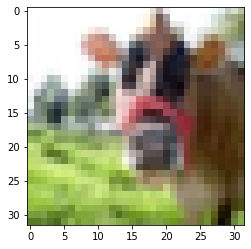

In [35]:
pyplot.imshow(x_train[0])


In [36]:
y_train[0]

array([19])

In [37]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
np.random.seed(1)

img, labels = (x_train[0:1000].reshape(1000, 32, 32, 3), y_train[0:1000])


# creating an array of zeros 
one_hot_labels = np.zeros((len(labels), 100))

# assigning 1 to where the label would be for that particular array
# for example, if the array 
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

for i,l in enumerate(y_test):
    test_label[i][l] = 1



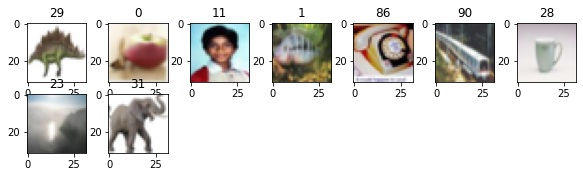

In [46]:
fig = plt.figure(figsize=(10,5))

for n in range(1, 10):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(np.argmax(labels[n]))


## VGG16 Architecture

In [0]:

def create_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096))
  # model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(Dense(units=4096))
  # model.add(BatchNormalization())
  model.add(Activation("relu"))

  model.add(Dense(units=100, activation="softmax"))

  return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 256)        

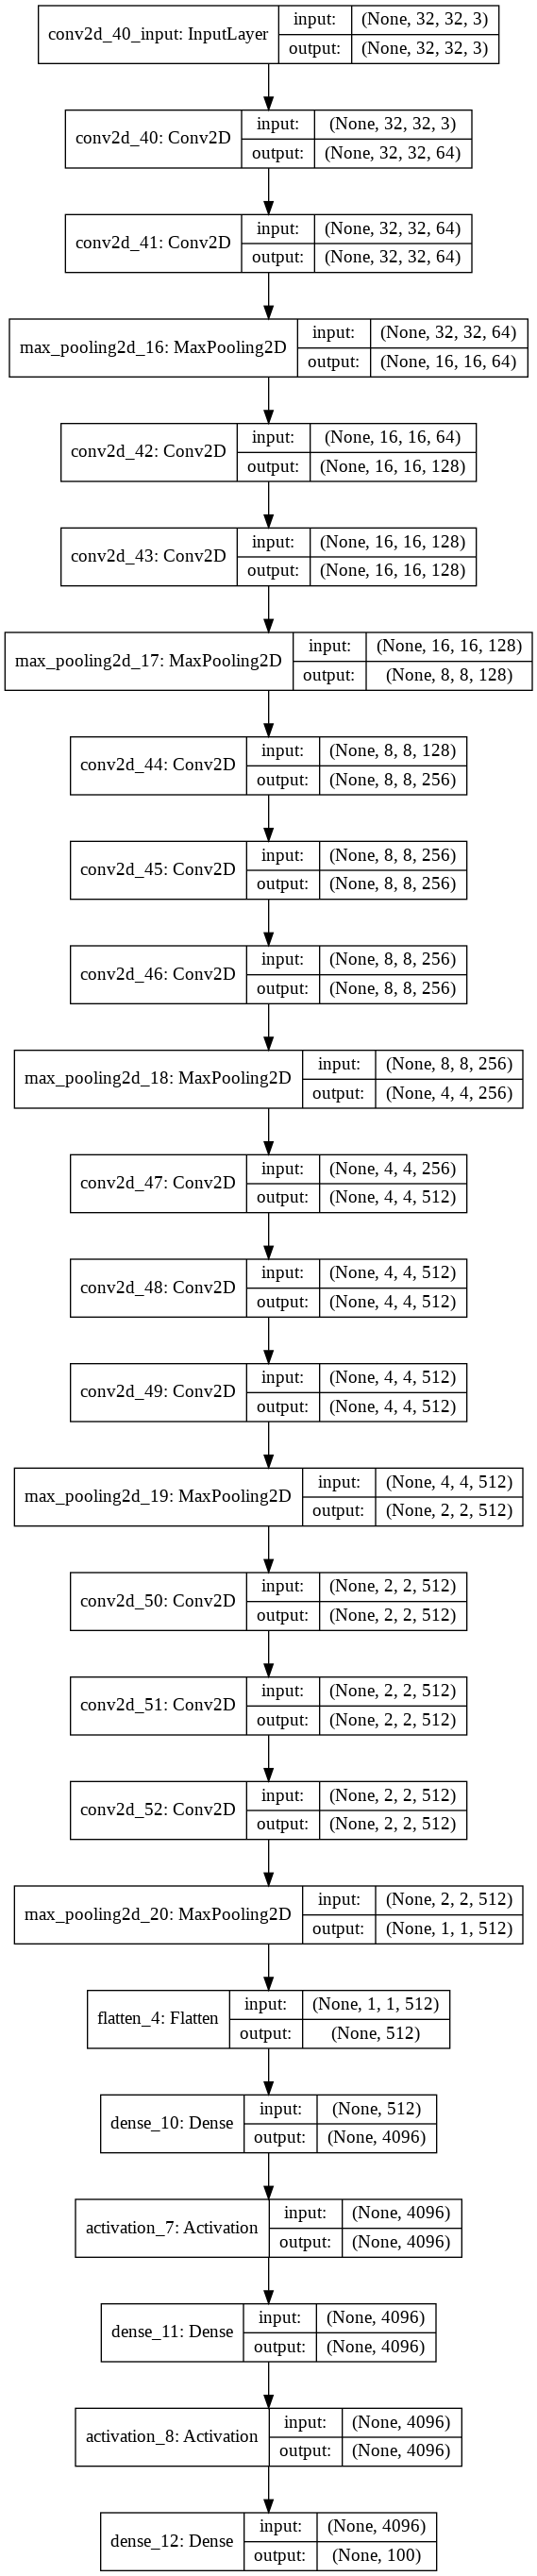

In [23]:
model = create_model()
model.summary()
plot_model(model, show_shapes=True)

In [57]:
# create tensorboard
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/vgg16-keras" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# fitting model to 1000 samples from cifar100
model.fit(x=img, 
          y=labels, 
          epochs=5, 
          validation_data=(x_test, test_label), 
          callbacks=[tensorboard_callback])



Train on 1000 samples, validate on 10000 samples
Epoch 1/5
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0603 - accuracy: 0.9897 - val_loss: 0.1015 - val_accuracy: 0.9801
Epoch 2/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0559 - accuracy: 0.9900 - val_loss: 0.1021 - val_accuracy: 0.9801
Epoch 3/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0558 - accuracy: 0.9900 - val_loss: 0.1020 - val_accuracy: 0.9801
Epoch 4/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0557 - accuracy: 0.9900 - val_loss: 0.1024 - val_accuracy: 0.9801
Epoch 5/5
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0557 - accuracy: 0.9900 - val_loss: 0.1021 - val_accuracy: 0.9801


In [61]:
model.evaluate(x_test, test_label)

10000/10000 [==============================] - 3s 294us/step


[0.10213301882743836, 0.9801099896430969]

In [81]:
!tensorboard dev upload --logdir ./logs \
  --name "MNIST Classification using VGG16 with Keras"

2020-05-18 05:26:26.878300: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/Vofmi1ySRreqlu9NfL3bOQ/
E0518 05:26:32.323314 139752814421888 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0518 05:26:34.563706 139752814421888 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0518 05:26:35.624758 139752814421888 uploader.py:770] Attempted to re-upload existing blob.  Skipping.

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/Vofmi1ySRreqlu9NfL3bOQ/


Updating the model to fit with more data. Updating the one hot labels to include all 50000 samples


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 8, 256)        

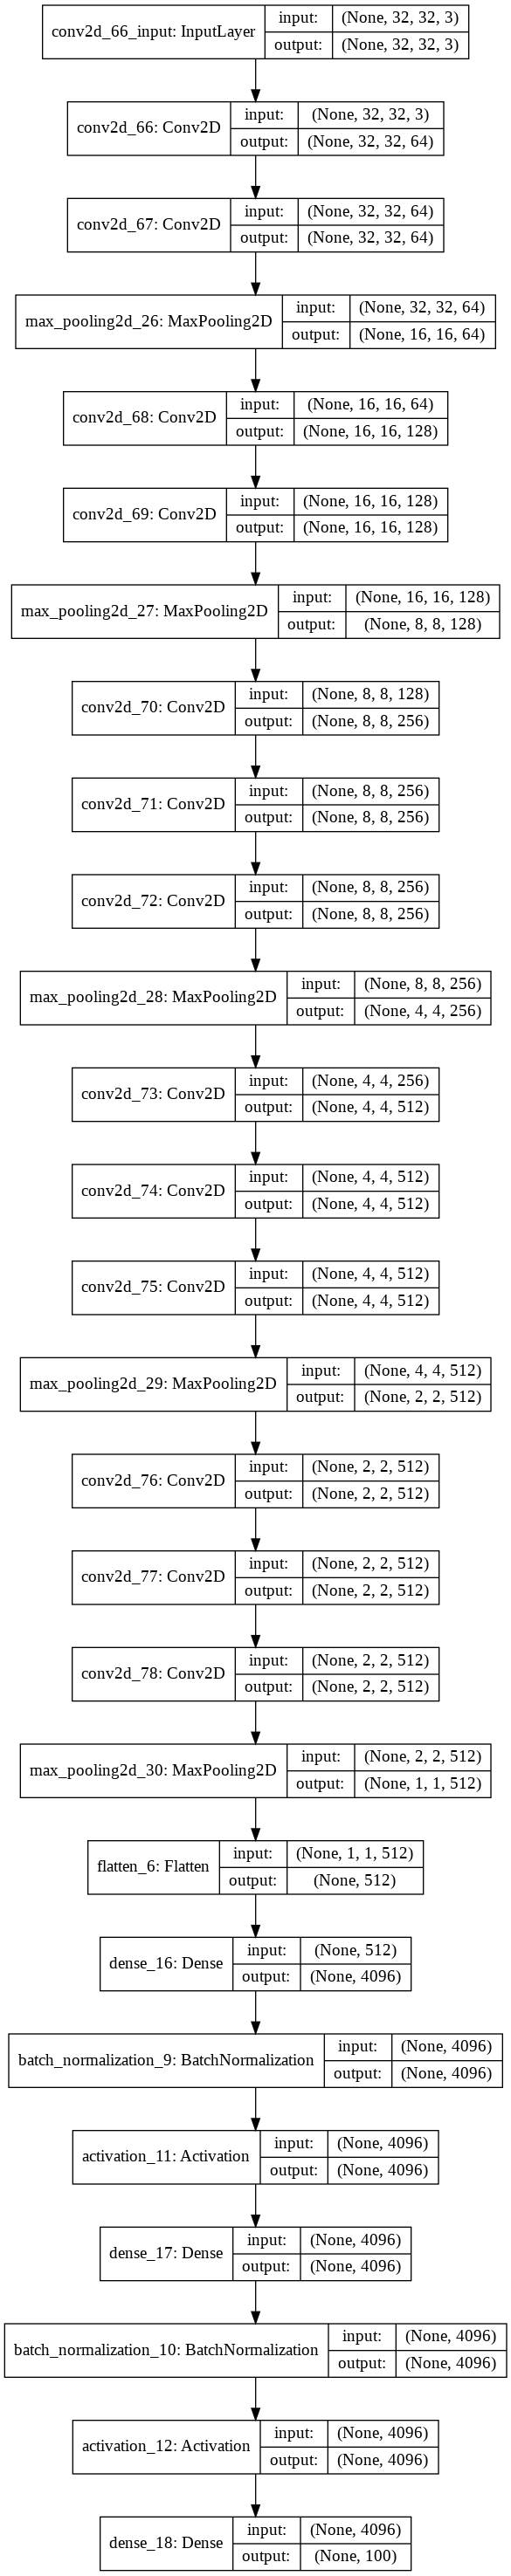

In [79]:

def create_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(Dense(units=4096))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  model.add(Dense(units=100, activation="softmax"))

  return model
model = create_model()
model.summary()
plot_model(model, show_shapes=True)

In [0]:
# creating an array of zeros 
one_hot_labels = np.zeros((len(y_train), 100))


# assigning 1 to where the label would be for that particular array
# for example, if the array 

for i,l in enumerate(y_train):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

In [80]:
# create tensorboard
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
              

log_dir="logs/vgg16-keras-50000" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# fitting model to 1000 samples from cifar100
model.fit(x=x_train, 
          y=labels, 
          epochs=5, 
          validation_data=(x_test, test_label), 
          callbacks=[tensorboard_callback])



Train on 50000 samples, validate on 10000 samples
Epoch 1/5
  160/50000 [..............................] - ETA: 7:05 - loss: 0.0984 - accuracy: 0.9869

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.136981). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 87s 2ms/step - loss: 0.0688 - accuracy: 0.9895 - val_loss: 0.2052 - val_accuracy: 0.9765
Epoch 2/5
50000/50000 [==============================] - 85s 2ms/step - loss: 0.0587 - accuracy: 0.9899 - val_loss: 0.1062 - val_accuracy: 0.9800
Epoch 3/5
50000/50000 [==============================] - 86s 2ms/step - loss: 0.0548 - accuracy: 0.9899 - val_loss: 0.0995 - val_accuracy: 0.9801
Epoch 4/5
50000/50000 [==============================] - 85s 2ms/step - loss: 0.0523 - accuracy: 0.9900 - val_loss: 0.1002 - val_accuracy: 0.9801
Epoch 5/5
50000/50000 [==============================] - 85s 2ms/step - loss: 0.0508 - accuracy: 0.9900 - val_loss: 0.1123 - val_accuracy: 0.9800


In [87]:
model.evaluate(x_test, test_label)

10000/10000 [==============================] - 3s 300us/step


[0.11232646963596345, 0.9799792766571045]

In [0]:
model.save('/content/drive/My Drive/CMPE 258 - Deep Learning/Assignments/Assignment 4/vgg16.h5')


## Visualization

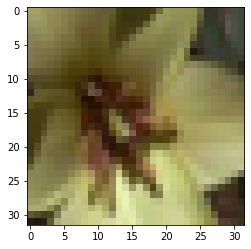

In [110]:
pyplot.imshow(x_test[5])


In [113]:
img_tensor = image.img_to_array(x_test[5])
img_tensor = np.expand_dims(img_tensor, axis=0)

# img = np.pad(img, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 32, 32, 1)
print(img_tensor.shape)


(1, 32, 32, 3)


In [0]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [115]:
first_layer_activation = activations[0]

# printing the first layer of the mnist dataset
# it's a 30x30 feature map with 6 channels
print(first_layer_activation.shape)

(1, 32, 32, 64)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


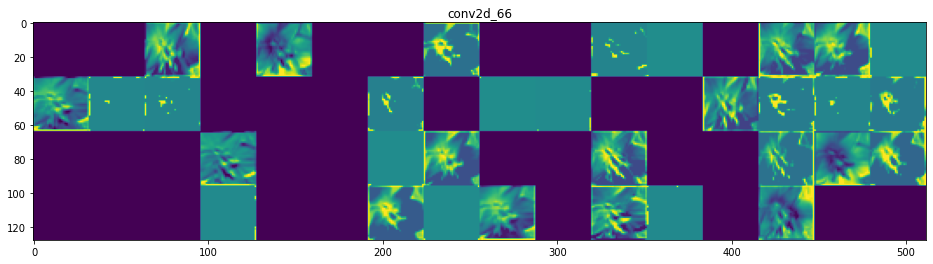

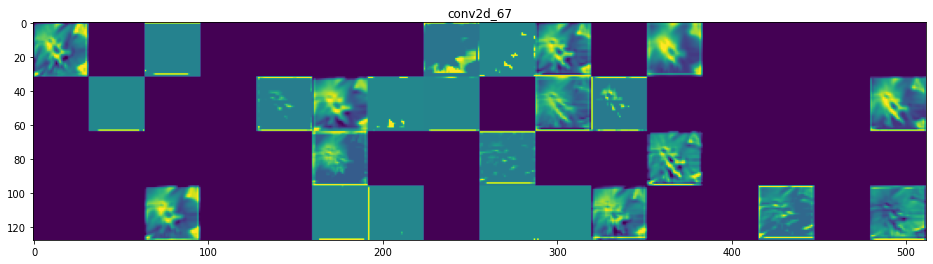

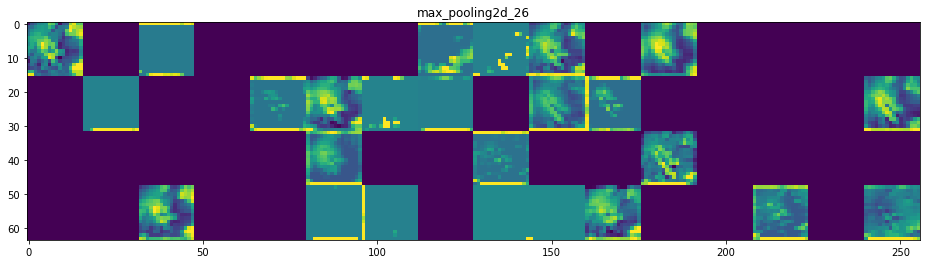

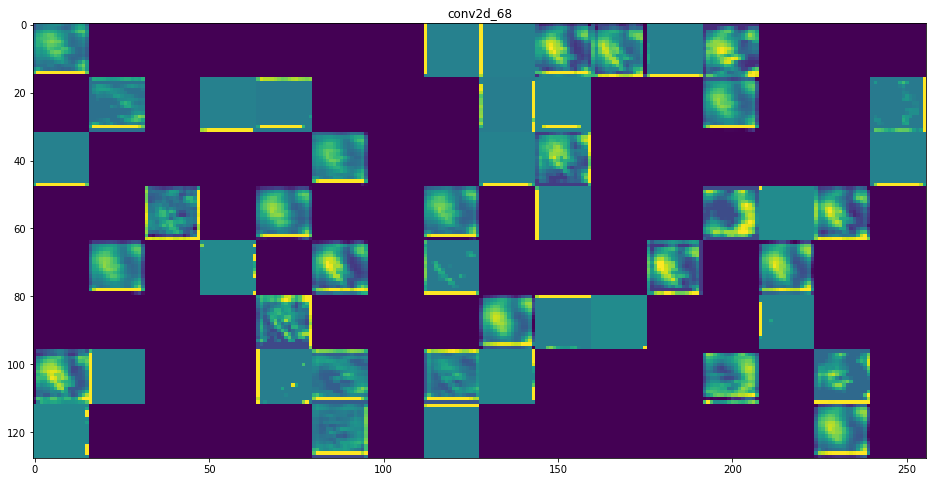

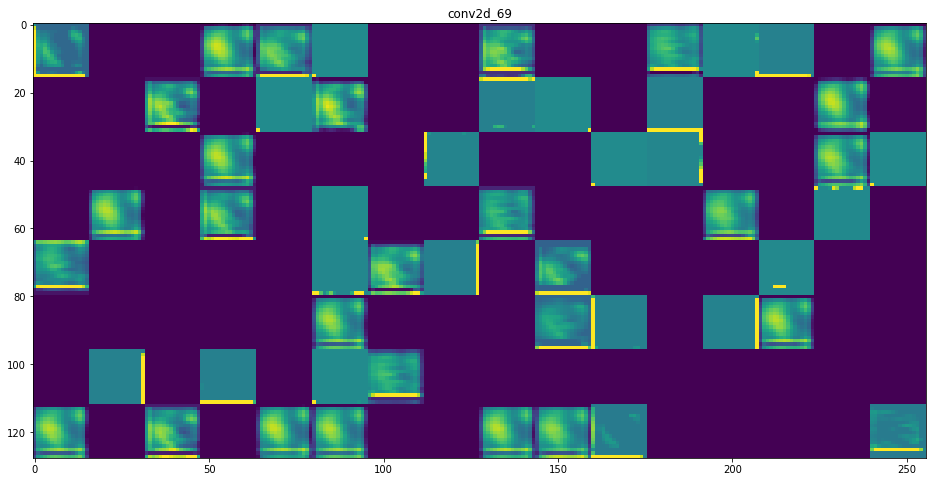

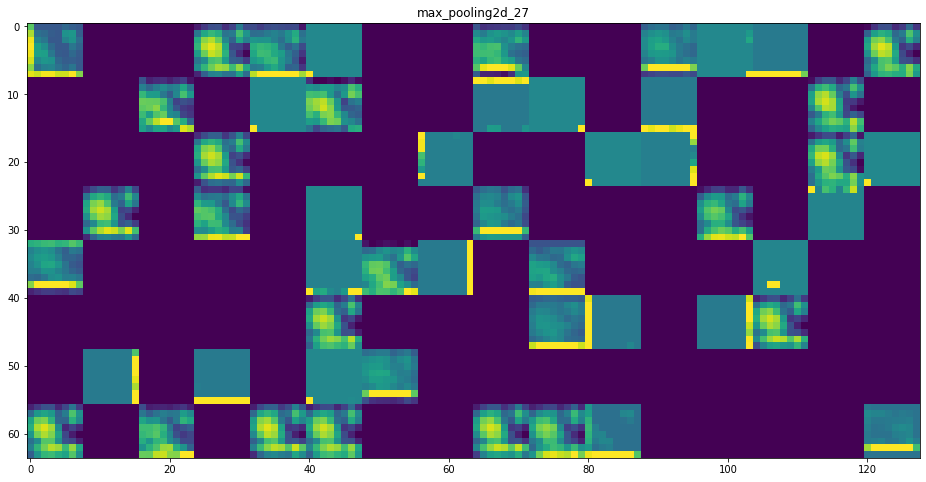

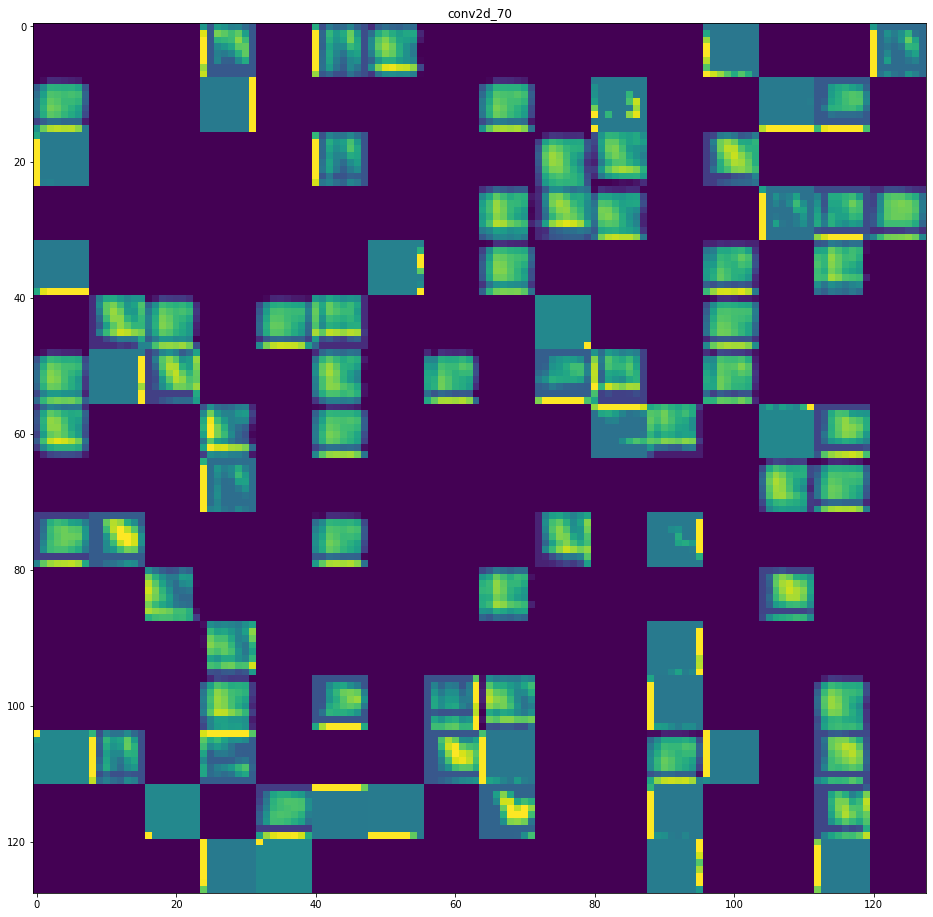

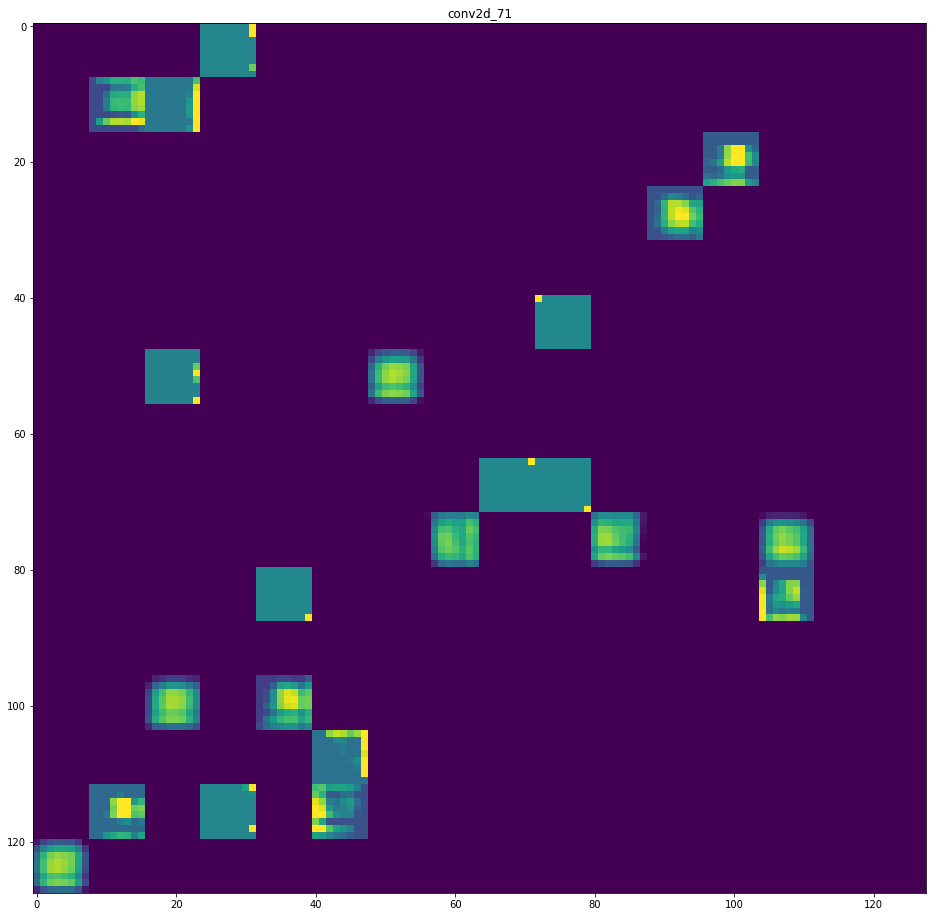

In [116]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()